> ### Aplicação 01 - Prevendo Pulsares com o dataset 'pulsar-star'

O dataset pode ser encontrado em: https://www.kaggle.com/datasets/spacemod/pulsar-dataset?resource=download

A referência da Aplicação 01 é: https://github.com/pb111/Support-Vector-Machines-Project/blob/master/Support%20Vector%20Machines%20with%20Python%20and%20Scikit-Learn.ipynb

In [1]:
# Importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importação do dataset

data = './datasets/pulsar_stars.csv'
df = pd.read_csv(data)

In [3]:
# Análise exploratória dos dados
df.shape
print('O dataset possui {} instâncias e {} variáveis'.format(df.shape[0],df.shape[1]))

O dataset possui 17898 instâncias e 9 variáveis


In [4]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
# Renomeando as colunas para formatação dos dados


df.columns = ['IP Mean','IP Sd', 'IP Kurtosis', 'IP Skewness',
              'DM-SNR Mean','DM-SNR Sd','DM-SNR Kurtosis','DM-SNR Skewness',
              'target_class']

In [6]:
nome_colunas = df.columns
nome_colunas

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [8]:
# Verificação se há dados ausentes
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

### Criando os vetores

In [9]:
X = df.drop(['target_class'], axis=1) #remove a coluna target do dataframe
y = df['target_class'] # atribui à y a coluna target_class do dataframe

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 42)
X_train.shape, X_test.shape

((14318, 8), (3580, 8))

### Escalonando Características

Essa etapa prepara os dados de treino (X_train) pelo classificador da regressão logística.

In [12]:
cols = X_train.columns

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,-8.833399e-17,7.143639e-16,2.431666e-17,-2.431666e-17,3.176054e-17,2.828673e-17,-3.674793e-16,-1.523513e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.105247e+00,-3.185842e+00,-2.217175e+00,-5.785606e-01,-4.199079e-01,-9.694685e-01,-2.530626e+00,-9.974420e-01
25%,-4.007893e-01,-6.119263e-01,-4.253022e-01,-3.178782e-01,-3.624010e-01,-6.084102e-01,-5.585661e-01,-6.521247e-01
50%,1.599521e-01,5.848197e-02,-2.395366e-01,-2.544987e-01,-3.325460e-01,-4.017452e-01,2.328398e-02,-2.086906e-01
75%,6.233520e-01,6.515878e-01,-5.006169e-03,-1.359962e-01,-2.436730e-01,1.018200e-01,5.284156e-01,3.188089e-01
max,3.179668e+00,7.645531e+00,7.151513e+00,1.078746e+01,7.119315e+00,4.326040e+00,5.784920e+00,1.006298e+01


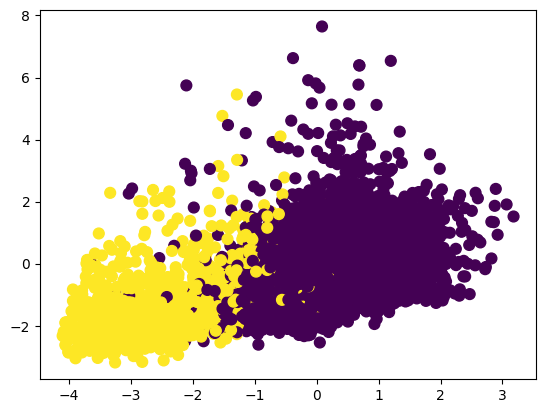

In [15]:
fig, ax = plt.subplots()

ax.scatter(X_train['IP Mean'], X_train['IP Sd'],c=y_train,s=60)
#ax.plot(X_train['IP Mean'], y_train,'r')

#ax.set(ylim=(-2,6)) # melhora a visualização 
plt.show()

### Hyperparâmetros padrão do SVM

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Instância da classe SVC
classificador = SVC()

# Treina o classificador com os dados préprocessados
classificador.fit(X_train,y_train)

# Faz uma predição nos dados de teste
y_pred = classificador.predict(X_test)

# calcula e imprime a Acurácia
print('Acurácia do modelo com os hiperparâmetros padrões: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Acurácia do modelo com os hiperparâmetros padrões: 0.9796


In [17]:
X_test

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
0,0.227131,0.348453,-0.274718,-0.308276,-0.324496,-0.437893,-0.045197,-0.248413
1,-1.384257,-1.778741,1.458045,1.119963,-0.299923,-0.224581,-0.282317,-0.461046
2,-0.304514,0.066867,0.025073,-0.153641,-0.351272,-0.546320,0.221374,-0.004379
3,-0.390126,0.299699,0.502791,-0.099850,2.339153,2.829864,-1.730749,-0.989477
4,0.083633,0.302819,-0.175344,-0.239661,-0.214566,0.015808,-0.835829,-0.777850
...,...,...,...,...,...,...,...,...
3575,-0.830066,0.585794,0.100074,-0.257942,-0.345510,-0.537090,0.235683,0.005449
3576,0.748418,0.928754,-0.551968,-0.335569,-0.361017,-0.654496,0.491728,0.351386
3577,0.053471,-0.121114,-0.284781,-0.266637,-0.310797,-0.245360,-0.274473,-0.475080
3578,-0.772789,0.282378,0.366108,-0.164563,-0.321587,-0.394416,-0.230750,-0.400899


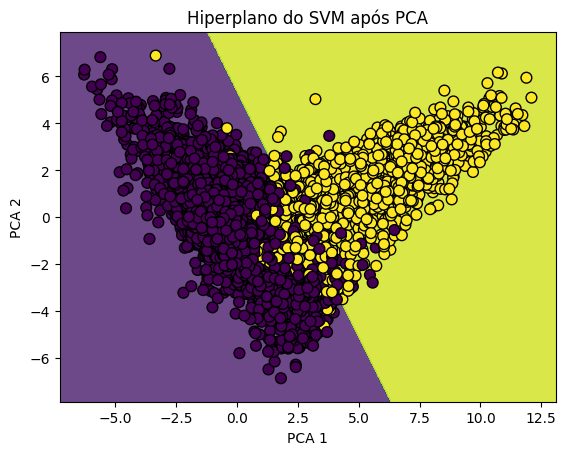

In [18]:
from sklearn.decomposition import PCA
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# Reduzindo para 2D com PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Treinando o SVM com os dados transformados
clf = svm.SVC(kernel='linear')  # Use o kernel que você treinou
clf.fit(X_train_pca, y_train)

# Criando uma malha de pontos no espaço PCA
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Classificando cada ponto na malha
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizando graficamente
fig, ax = plt.subplots()
ax.contourf(xx, yy, Z, alpha=0.8)  # Regiões de decisão
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=60, edgecolors='k')  # Dados de treino

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Hiperplano do SVM após PCA')
plt.show()

### Executando o SVM com o kernel linear

In [19]:
classificador2 = SVC(kernel='linear').fit(X_train, y_train)

In [20]:
classificador2.coef_

array([[ 0.473471  , -0.01391273,  2.60760856, -0.68600754, -0.3431745 ,
         0.36764404,  0.01810114, -0.08674593]])

In [21]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9791


In [22]:
linear_svc.predict([[1.227131,0.348453,-1.274718,-0.308276,-0.324496,-0.437893,-0.045197,-0.248413]])

array([0])

### Matriz de Confusão

<AxesSubplot: >

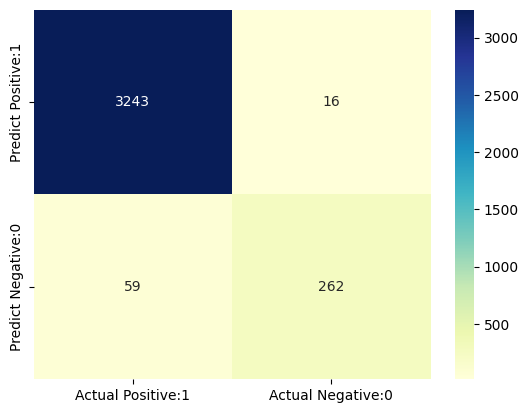

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')